<a href="https://colab.research.google.com/github/PaulLemaron/Superstore-Sales-Data-Analytics-Using-Python/blob/main/SuperStore_Sales_Data_Analytics_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **SuperStore Data Analytics Project**
This Project will have a focus on:


Key Tasks


1.   Superstore Customer Segmentation
2.   Revenue by Customer Segment
3.   Customers Sales Insights
4.   Exploring Customer Loyalty at Superstores
5.   Superstore Shipping Strategies
6.   Geographic Market Analysis
7.   Product Performance Insights
8.   Comprehensive Sales Analysis
9.   Tracking Sales Trends
10.  Visualizing Sales by State



In [2]:
import pandas as pd

In [3]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [4]:
from google.colab import drive
drive.mount('/content/drive')


Mounted at /content/drive


In [13]:
import pandas as pd

github_url = 'https://raw.githubusercontent.com/PaulLemaron/Python_For_Data_Analytics/main/Sample%20-%20Superstore.csv'

# Try different encodings if needed
try:
    df = pd.read_csv(github_url)
    print("Loaded with default encoding")
except UnicodeDecodeError:
    df = pd.read_csv(github_url, encoding='latin-1')
    print("Loaded with latin-1 encoding")

print(f"Shape: {df.shape}")
print(df.head())

Loaded with latin-1 encoding
Shape: (9994, 21)
   Row ID        Order ID  Order Date   Ship Date       Ship Mode Customer ID  \
0       1  CA-2016-152156   11/8/2016  11/11/2016    Second Class    CG-12520   
1       2  CA-2016-152156   11/8/2016  11/11/2016    Second Class    CG-12520   
2       3  CA-2016-138688   6/12/2016   6/16/2016    Second Class    DV-13045   
3       4  US-2015-108966  10/11/2015  10/18/2015  Standard Class    SO-20335   
4       5  US-2015-108966  10/11/2015  10/18/2015  Standard Class    SO-20335   

     Customer Name    Segment        Country             City  ...  \
0      Claire Gute   Consumer  United States        Henderson  ...   
1      Claire Gute   Consumer  United States        Henderson  ...   
2  Darrin Van Huff  Corporate  United States      Los Angeles  ...   
3   Sean O'Donnell   Consumer  United States  Fort Lauderdale  ...   
4   Sean O'Donnell   Consumer  United States  Fort Lauderdale  ...   

  Postal Code  Region       Product ID       

# **Basic Data Exploration:**

In [14]:
# Check basic info about the dataset
print(df.info())
print('---------------')
# Check for missing values
print(df.isnull().sum())
print('---------------')
# Statistical summary
print(df.describe())
print('---------------')
# Check unique values in categorical columns
print(df['Category'].value_counts())
print(df['Region'].value_counts())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9994 entries, 0 to 9993
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Row ID         9994 non-null   int64  
 1   Order ID       9994 non-null   object 
 2   Order Date     9994 non-null   object 
 3   Ship Date      9994 non-null   object 
 4   Ship Mode      9994 non-null   object 
 5   Customer ID    9994 non-null   object 
 6   Customer Name  9994 non-null   object 
 7   Segment        9994 non-null   object 
 8   Country        9994 non-null   object 
 9   City           9994 non-null   object 
 10  State          9994 non-null   object 
 11  Postal Code    9994 non-null   int64  
 12  Region         9994 non-null   object 
 13  Product ID     9994 non-null   object 
 14  Category       9994 non-null   object 
 15  Sub-Category   9994 non-null   object 
 16  Product Name   9994 non-null   object 
 17  Sales          9994 non-null   float64
 18  Quantity

# **Convert date columns to datetime format:**

In [15]:
df['Order Date'] = pd.to_datetime(df['Order Date'])
df['Ship Date'] = pd.to_datetime(df['Ship Date'])

# **Sample analysis queries:**

In [16]:
# Total sales by category
sales_by_category = df.groupby('Category')['Sales'].sum()
print('The sales by category is: ',sales_by_category)

# Top 10 customers by sales
top_customers = df.groupby('Customer Name')['Sales'].sum().sort_values(ascending=False).head(10)
print('Top 10 Customers by sales are: ', top_customers)

# Profit margin analysis
df['Profit Margin'] = df['Profit'] / df['Sales']

The sales by category is:  Category
Furniture          741999.7953
Office Supplies    719047.0320
Technology         836154.0330
Name: Sales, dtype: float64
Top 10 Customers by sales are:  Customer Name
Sean Miller           25043.050
Tamara Chand          19052.218
Raymond Buch          15117.339
Tom Ashbrook          14595.620
Adrian Barton         14473.571
Ken Lonsdale          14175.229
Sanjit Chand          14142.334
Hunter Lopez          12873.298
Sanjit Engle          12209.438
Christopher Conant    12129.072
Name: Sales, dtype: float64


In [17]:
df.head()

,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Country,City,...,Region,Product ID,Category,Sub-Category,Product Name,Sales,Quantity,Discount,Profit,Profit Margin
0,1,CA-2016-152156,2016-11-08,2016-11-11,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,...,South,FUR-BO-10001798,Furniture,Bookcases,Bush Somerset Collection Bookcase,261.9600,2,0.00,41.9136,0.1600
1,2,CA-2016-152156,2016-11-08,2016-11-11,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,...,South,FUR-CH-10000454,Furniture,Chairs,"Hon Deluxe Fabric Upholstered Stacking Chairs,...",731.9400,3,0.00,219.5820,0.3000
2,3,CA-2016-138688,2016-06-12,2016-06-16,Second Class,DV-13045,Darrin Van Huff,Corporate,United States,Los Angeles,...,West,OFF-LA-10000240,Office Supplies,Labels,Self-Adhesive Address Labels for Typewriters b...,14.6200,2,0.00,6.8714,0.4700
3,4,US-2015-108966,2015-10-11,2015-10-18,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,...,South,FUR-TA-10000577,Furniture,Tables,Bretford CR4500 Series Slim Rectangular Table,957.5775,5,0.45,-383.0310,-0.4000
4,5,US-2015-108966,2015-10-11,2015-10-18,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,...,South,OFF-ST-10000760,Office Supplies,Storage,Eldon Fold 'N Roll Cart System,22.3680,2,0.20,2.5164,0.1125


In [19]:
if df.duplicated().sum() > 0:
  print('There are duplicates')
else:
  print('There are no duplicates')

There are no duplicates


# **Types of Customers**

In [21]:
types_of_customers = df['Segment'].value_counts()
print(types_of_customers)

Segment
Consumer       5191
Corporate      3020
Home Office    1783
Name: count, dtype: int64


In [27]:
number_of_customers = df['Segment'].value_counts().reset_index()
number_of_customers.columns = ['Segment', 'Number of Customers']
number_of_customers = number_of_customers.rename(columns={'Segment': 'Type Of Customer'})
print(number_of_customers)

  Type Of Customer  Number of Customers
0         Consumer                 5191
1        Corporate                 3020
2      Home Office                 1783


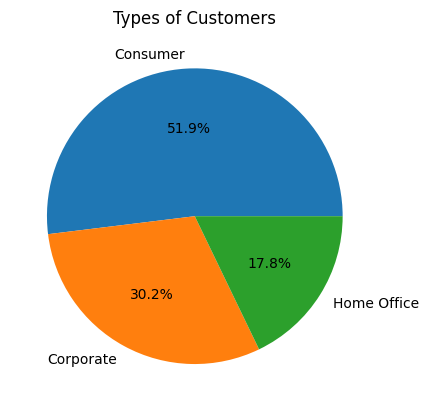

In [31]:
plt.pie(number_of_customers['Number of Customers'], labels=number_of_customers['Type Of Customer'], autopct='%1.1f%%')
plt.title('Types of Customers')
plt.show()

Customer Acquisition Cost in each segment

Customer Satisfaction

Customer Churn

Revenue

Customer Lifetime Value

## Obtain Sales Number for each customer type

       Segment   Total Sales
0     Consumer  1.161401e+06
1    Corporate  7.061464e+05
2  Home Office  4.296531e+05


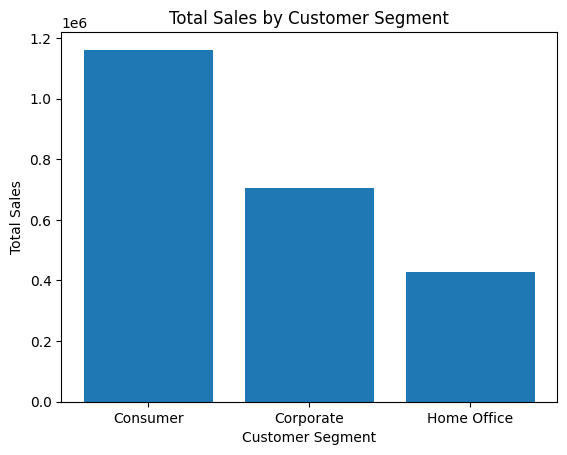

In [33]:
sales_per_segment = df.groupby('Segment')['Sales'].sum().reset_index()
sales_per_segment.columns = ['Segment', 'Total Sales']
print(sales_per_segment)
plt.bar(sales_per_segment['Segment'], sales_per_segment['Total Sales'])
plt.xlabel('Customer Segment')
plt.ylabel('Total Sales')
plt.title('Total Sales by Customer Segment')
plt.show()

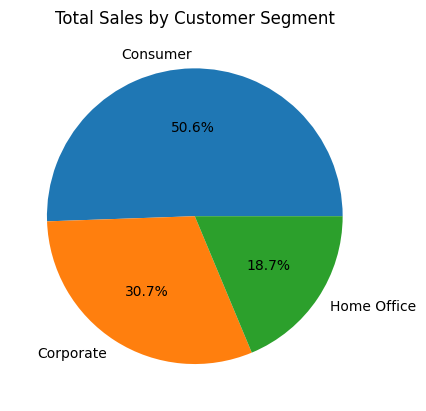

In [34]:
plt.pie(sales_per_segment['Total Sales'], labels=sales_per_segment['Segment'], autopct='%1.1f%%')
plt.title('Total Sales by Customer Segment')
plt.show()

## **Customer Loyalty**

## **1. Customer Loyalty By Quantity of Sales**

In [35]:
df.head(3)

,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Country,City,...,Region,Product ID,Category,Sub-Category,Product Name,Sales,Quantity,Discount,Profit,Profit Margin
0,1,CA-2016-152156,2016-11-08,2016-11-11,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,...,South,FUR-BO-10001798,Furniture,Bookcases,Bush Somerset Collection Bookcase,261.96,2,0.0,41.9136,0.16
1,2,CA-2016-152156,2016-11-08,2016-11-11,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,...,South,FUR-CH-10000454,Furniture,Chairs,"Hon Deluxe Fabric Upholstered Stacking Chairs,...",731.94,3,0.0,219.5820,0.30
2,3,CA-2016-138688,2016-06-12,2016-06-16,Second Class,DV-13045,Darrin Van Huff,Corporate,United States,Los Angeles,...,West,OFF-LA-10000240,Office Supplies,Labels,Self-Adhesive Address Labels for Typewriters b...,14.62,2,0.0,6.8714,0.47


In [51]:
customer_orders_frequency = df.groupby(['Customer ID', 'Customer Name', 'Segment'])['Order ID'].nunique().reset_index()
customer_orders_frequency.columns = ['Customer ID', 'Customer Name', 'Segment', 'Number of Orders']
print(customer_orders_frequency)

    Customer ID       Customer Name    Segment  Number of Orders
0      AA-10315          Alex Avila   Consumer                 5
1      AA-10375        Allen Armold   Consumer                 9
2      AA-10480        Andrew Allen   Consumer                 4
3      AA-10645       Anna Andreadi   Consumer                 6
4      AB-10015       Aaron Bergman   Consumer                 3
..          ...                 ...        ...               ...
788    XP-21865        Xylona Preis   Consumer                11
789    YC-21895      Yoseph Carroll  Corporate                 5
790    YS-21880       Yana Sorensen  Corporate                 8
791    ZC-21910    Zuschuss Carroll   Consumer                13
792    ZD-21925  Zuschuss Donatelli   Consumer                 5

[793 rows x 4 columns]


In [52]:
customer_orders_frequency.rename(columns={'Order ID': 'Total Orders'}, inplace=True)

In [53]:
repeat_customers = customer_orders_frequency[customer_orders_frequency['Number of Orders'] > 1]
print(repeat_customers)

    Customer ID       Customer Name    Segment  Number of Orders
0      AA-10315          Alex Avila   Consumer                 5
1      AA-10375        Allen Armold   Consumer                 9
2      AA-10480        Andrew Allen   Consumer                 4
3      AA-10645       Anna Andreadi   Consumer                 6
4      AB-10015       Aaron Bergman   Consumer                 3
..          ...                 ...        ...               ...
788    XP-21865        Xylona Preis   Consumer                11
789    YC-21895      Yoseph Carroll  Corporate                 5
790    YS-21880       Yana Sorensen  Corporate                 8
791    ZC-21910    Zuschuss Carroll   Consumer                13
792    ZD-21925  Zuschuss Donatelli   Consumer                 5

[781 rows x 4 columns]


In [54]:
repeat_customers_sorted = repeat_customers.sort_values(by='Number of Orders', ascending=False)
print(repeat_customers_sorted.head(12).reset_index(drop=True))

   Customer ID        Customer Name    Segment  Number of Orders
0     EP-13915           Emily Phan   Consumer                17
1     JE-15745           Joel Eaton   Consumer                13
2     ZC-21910     Zuschuss Carroll   Consumer                13
3     PG-18820      Patrick Gardner   Consumer                13
4     SH-19975        Sally Hughsby  Corporate                13
5     NS-18640         Noel Staavos  Corporate                13
6     EA-14035        Erin Ashbrook  Corporate                13
7     CK-12205  Chloris Kastensmidt   Consumer                13
8     LC-16885       Lena Creighton   Consumer                12
9     EH-13765         Edward Hooks  Corporate                12
10    DK-12835      Damala Kotsonis  Corporate                12
11    PK-19075            Pete Kriz   Consumer                12


## **2. Customer Loyalty By Amount of Sales**

In [56]:
customer_sales_frequency = df.groupby(['Customer ID', 'Customer Name', 'Segment'])['Sales'].sum().reset_index()
customer_sales_frequency.columns = ['Customer ID', 'Customer Name', 'Segment', 'Total Sales']
print(customer_sales_frequency)

    Customer ID       Customer Name    Segment  Total Sales
0      AA-10315          Alex Avila   Consumer     5563.560
1      AA-10375        Allen Armold   Consumer     1056.390
2      AA-10480        Andrew Allen   Consumer     1790.512
3      AA-10645       Anna Andreadi   Consumer     5086.935
4      AB-10015       Aaron Bergman   Consumer      886.156
..          ...                 ...        ...          ...
788    XP-21865        Xylona Preis   Consumer     2374.658
789    YC-21895      Yoseph Carroll  Corporate     5454.350
790    YS-21880       Yana Sorensen  Corporate     6720.444
791    ZC-21910    Zuschuss Carroll   Consumer     8025.707
792    ZD-21925  Zuschuss Donatelli   Consumer     1493.944

[793 rows x 4 columns]


In [57]:
top_spenders = customer_sales_frequency.sort_values(by='Total Sales', ascending=False)
print(top_spenders.head(12).reset_index(drop=True))

   Customer ID       Customer Name      Segment  Total Sales
0     SM-20320         Sean Miller  Home Office    25043.050
1     TC-20980        Tamara Chand    Corporate    19052.218
2     RB-19360        Raymond Buch     Consumer    15117.339
3     TA-21385        Tom Ashbrook  Home Office    14595.620
4     AB-10105       Adrian Barton     Consumer    14473.571
5     KL-16645        Ken Lonsdale     Consumer    14175.229
6     SC-20095        Sanjit Chand     Consumer    14142.334
7     HL-15040        Hunter Lopez     Consumer    12873.298
8     SE-20110        Sanjit Engle     Consumer    12209.438
9     CC-12370  Christopher Conant     Consumer    12129.072
10    TS-21370        Todd Sumrall    Corporate    11891.751
11    GT-14710           Greg Tran     Consumer    11820.120


## **Shipping Model and strategies**

In [65]:
shipping_model = df['Ship Mode'].value_counts().reset_index()
shipping_model = shipping_model.rename(columns={'index': 'Shipping Model'})
shipping_model.columns = ['Shipping Model', 'Number of Orders']
print(shipping_model)

   Shipping Model  Number of Orders
0  Standard Class              5968
1    Second Class              1945
2     First Class              1538
3        Same Day               543


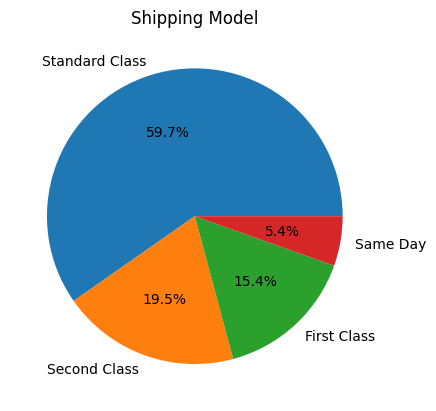

In [66]:
plt.pie(shipping_model['Number of Orders'], labels=shipping_model['Shipping Model'], autopct='%1.1f%%')
plt.title('Shipping Model')
plt.show()
#

## **Store Orders**

In [67]:
state = df['State'].value_counts().reset_index()
state = state.rename(columns={'index': 'State'})
state.columns = ['State', 'Number of Orders']
print(state)

                   State  Number of Orders
0             California              2001
1               New York              1128
2                  Texas               985
3           Pennsylvania               587
4             Washington               506
5               Illinois               492
6                   Ohio               469
7                Florida               383
8               Michigan               255
9         North Carolina               249
10               Arizona               224
11              Virginia               224
12               Georgia               184
13             Tennessee               183
14              Colorado               182
15               Indiana               149
16              Kentucky               139
17         Massachusetts               135
18            New Jersey               130
19                Oregon               124
20             Wisconsin               110
21              Maryland               105
22         

In [71]:
city = df['City'].value_counts().reset_index()
city = city.rename(columns={'index': 'City'})
city.columns = ['City', 'Number of Orders']
print(city.head(25))

             City  Number of Orders
0   New York City               915
1     Los Angeles               747
2    Philadelphia               537
3   San Francisco               510
4         Seattle               428
5         Houston               377
6         Chicago               314
7        Columbus               222
8       San Diego               170
9     Springfield               163
10         Dallas               157
11   Jacksonville               125
12        Detroit               115
13         Newark                95
14       Richmond                90
15        Jackson                82
16       Columbia                81
17         Aurora                68
18        Phoenix                63
19     Long Beach                61
20      Arlington                60
21    San Antonio                59
22     Louisville                57
23          Miami                57
24      Rochester                53


## **State Sales**

In [72]:
top_sales = df.groupby('State')['Sales'].sum().reset_index()
top_sales = top_sales.sort_values(by='Sales', ascending=False)
print(top_sales.head(10))

           State        Sales
3     California  457687.6315
30      New York  310876.2710
41         Texas  170188.0458
45    Washington  138641.2700
36  Pennsylvania  116511.9140
8        Florida   89473.7080
11      Illinois   80166.1010
33          Ohio   78258.1360
20      Michigan   76269.6140
44      Virginia   70636.7200


In [73]:
city_sales = df.groupby('City')['Sales'].sum().reset_index()
city_sales = city_sales.sort_values(by='Sales', ascending=False)
print(city_sales.head(10))
#

              City        Sales
329  New York City  256368.1610
266    Los Angeles  175851.3410
452        Seattle  119540.7420
438  San Francisco  112669.0920
374   Philadelphia  109077.0130
207        Houston   64504.7604
80         Chicago   48539.5410
437      San Diego   47521.0290
216   Jacksonville   44713.1830
464    Springfield   43054.3420


# **Product Performance Insights**

## **Track the top sales Categories**

In [74]:
from itertools import product
product_sales = df.groupby('Category')['Sales'].sum().reset_index()
product_sales = product_sales.sort_values(by='Sales', ascending=False)
print(product_sales)

          Category        Sales
2       Technology  836154.0330
0        Furniture  741999.7953
1  Office Supplies  719047.0320


In [75]:
product_subcategories = df.groupby('Sub-Category')['Sales'].sum().reset_index()
product_subcategories = product_subcategories.sort_values(by='Sales', ascending=False)
print(product_subcategories)

   Sub-Category        Sales
13       Phones  330007.0540
5        Chairs  328449.1030
14      Storage  223843.6080
16       Tables  206965.5320
3       Binders  203412.7330
11     Machines  189238.6310
0   Accessories  167380.3180
6       Copiers  149528.0300
4     Bookcases  114879.9963
1    Appliances  107532.1610
9   Furnishings   91705.1640
12        Paper   78479.2060
15     Supplies   46673.5380
2           Art   27118.7920
7     Envelopes   16476.4020
10       Labels   12486.3120
8     Fasteners    3024.2800


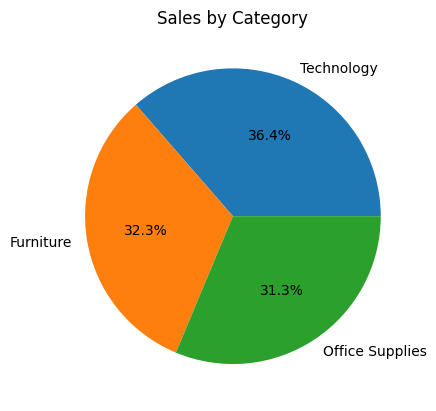

In [76]:
plt.pie(product_sales['Sales'], labels=product_sales['Category'], autopct='%1.1f%%')
plt.title('Sales by Category')
plt.show()

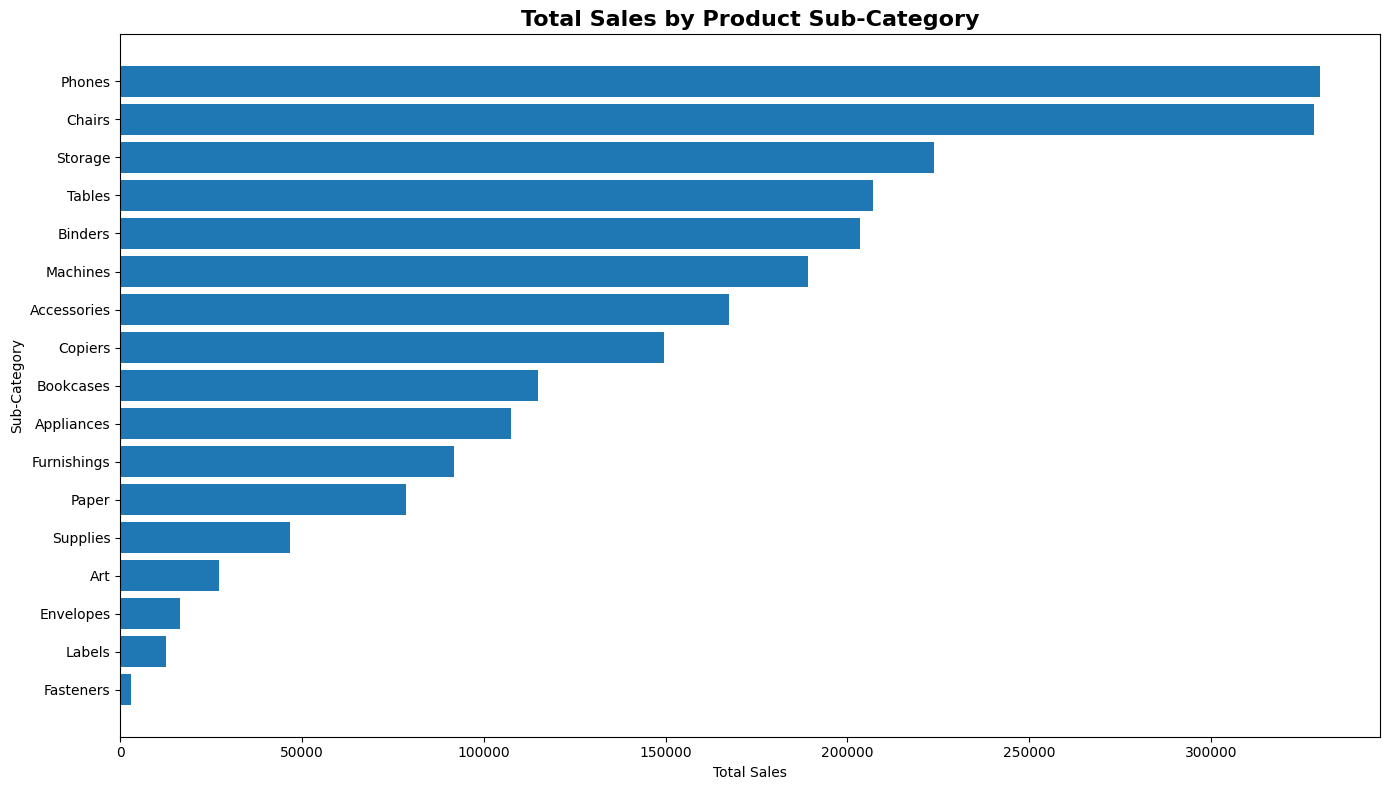

In [82]:
plt.figure(figsize=(14, 8))
plt.barh(product_subcategories['Sub-Category'], product_subcategories['Sales'])
plt.xlabel('Total Sales')
plt.ylabel('Sub-Category')
plt.title('Total Sales by Product Sub-Category', fontsize=16, fontweight='bold')
plt.gca().invert_yaxis()  # Highest sales at the top
plt.tight_layout()
plt.show()

## **Comprehensive Sales Trends**

In [85]:
df['Order Date'] = pd.to_datetime(df['Order Date'], dayfirst=True)
#df['Ship Date'] = pd.to_datetime(df['Ship Date'], dayfirst=True
yearly_sales = df.groupby(df['Order Date'].dt.year)['Sales'].sum().reset_index()
yearly_sales.columns = ['Year', 'Total Sales']
print(yearly_sales)

   Year  Total Sales
0  2014  484247.4981
1  2015  470532.5090
2  2016  609205.5980
3  2017  733215.2552


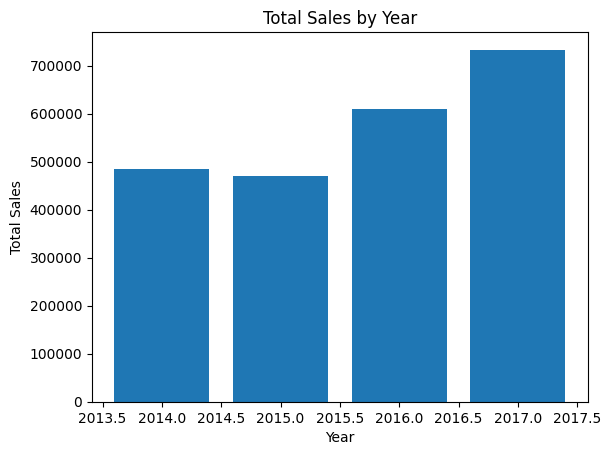

In [86]:
plt.bar(yearly_sales['Year'], yearly_sales['Total Sales'])
plt.xlabel('Year')
plt.ylabel('Total Sales')
plt.title('Total Sales by Year')
plt.show()

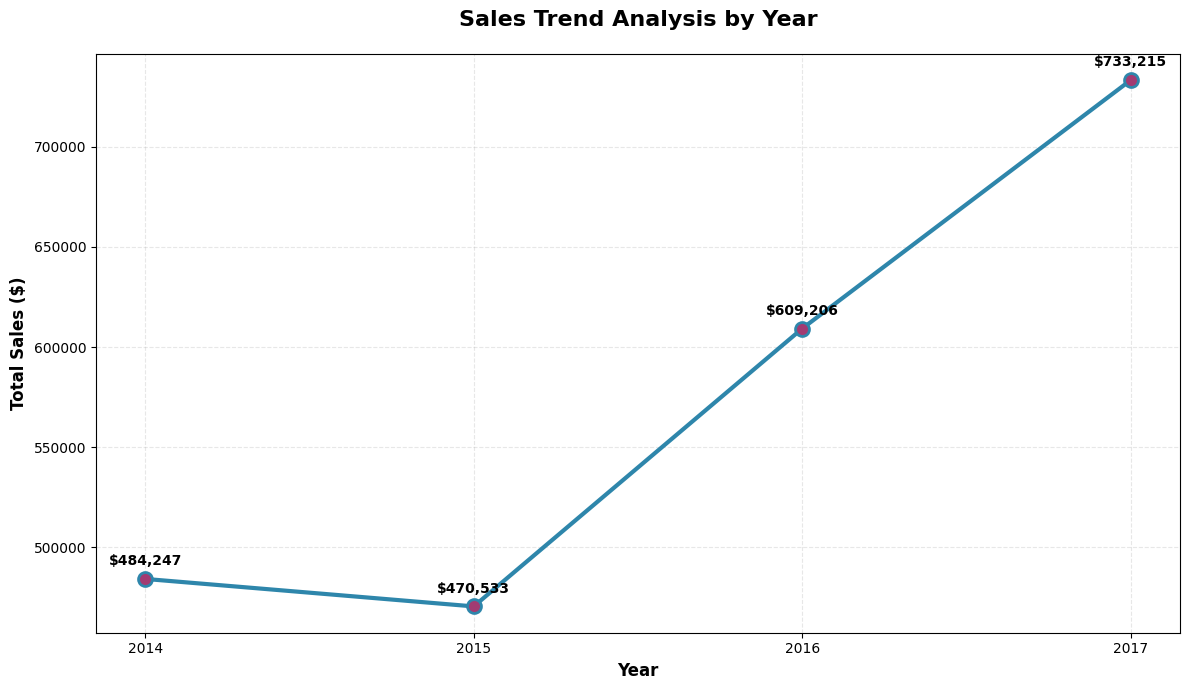

In [87]:
plt.figure(figsize=(12, 7))

# Create the line plot with styling
plt.plot(yearly_sales['Year'], yearly_sales['Total Sales'],
         marker='o',
         linewidth=3,
         markersize=10,
         color='#2E86AB',
         markerfacecolor='#A23B72',
         markeredgewidth=2)

# Add value labels on each point
for i, (year, sales) in enumerate(zip(yearly_sales['Year'], yearly_sales['Total Sales'])):
    plt.annotate(f'${sales:,.0f}',
                 (year, sales),
                 textcoords="offset points",
                 xytext=(0,10),
                 ha='center',
                 fontsize=10,
                 fontweight='bold')

plt.xlabel('Year', fontsize=12, fontweight='bold')
plt.ylabel('Total Sales ($)', fontsize=12, fontweight='bold')
plt.title('Sales Trend Analysis by Year', fontsize=16, fontweight='bold', pad=20)
plt.grid(True, alpha=0.3, linestyle='--')
plt.xticks(yearly_sales['Year'])
plt.tight_layout()
plt.show()

In [88]:
df['Order Date'] = pd.to_datetime(df['Order Date'], dayfirst=True)
monthly_sales = df.groupby(df['Order Date'].dt.to_period('M'))['Sales'].sum().reset_index()
monthly_sales.columns = ['Month', 'Total Sales']
print(monthly_sales)

      Month  Total Sales
0   2014-01   14236.8950
1   2014-02    4519.8920
2   2014-03   55691.0090
3   2014-04   28295.3450
4   2014-05   23648.2870
5   2014-06   34595.1276
6   2014-07   33946.3930
7   2014-08   27909.4685
8   2014-09   81777.3508
9   2014-10   31453.3930
10  2014-11   78628.7167
11  2014-12   69545.6205
12  2015-01   18174.0756
13  2015-02   11951.4110
14  2015-03   38726.2520
15  2015-04   34195.2085
16  2015-05   30131.6865
17  2015-06   24797.2920
18  2015-07   28765.3250
19  2015-08   36898.3322
20  2015-09   64595.9180
21  2015-10   31404.9235
22  2015-11   75972.5635
23  2015-12   74919.5212
24  2016-01   18542.4910
25  2016-02   22978.8150
26  2016-03   51715.8750
27  2016-04   38750.0390
28  2016-05   56987.7280
29  2016-06   40344.5340
30  2016-07   39261.9630
31  2016-08   31115.3743
32  2016-09   73410.0249
33  2016-10   59687.7450
34  2016-11   79411.9658
35  2016-12   96999.0430
36  2017-01   43971.3740
37  2017-02   20301.1334
38  2017-03   58872.3528


# **Tracking Sales Trends**

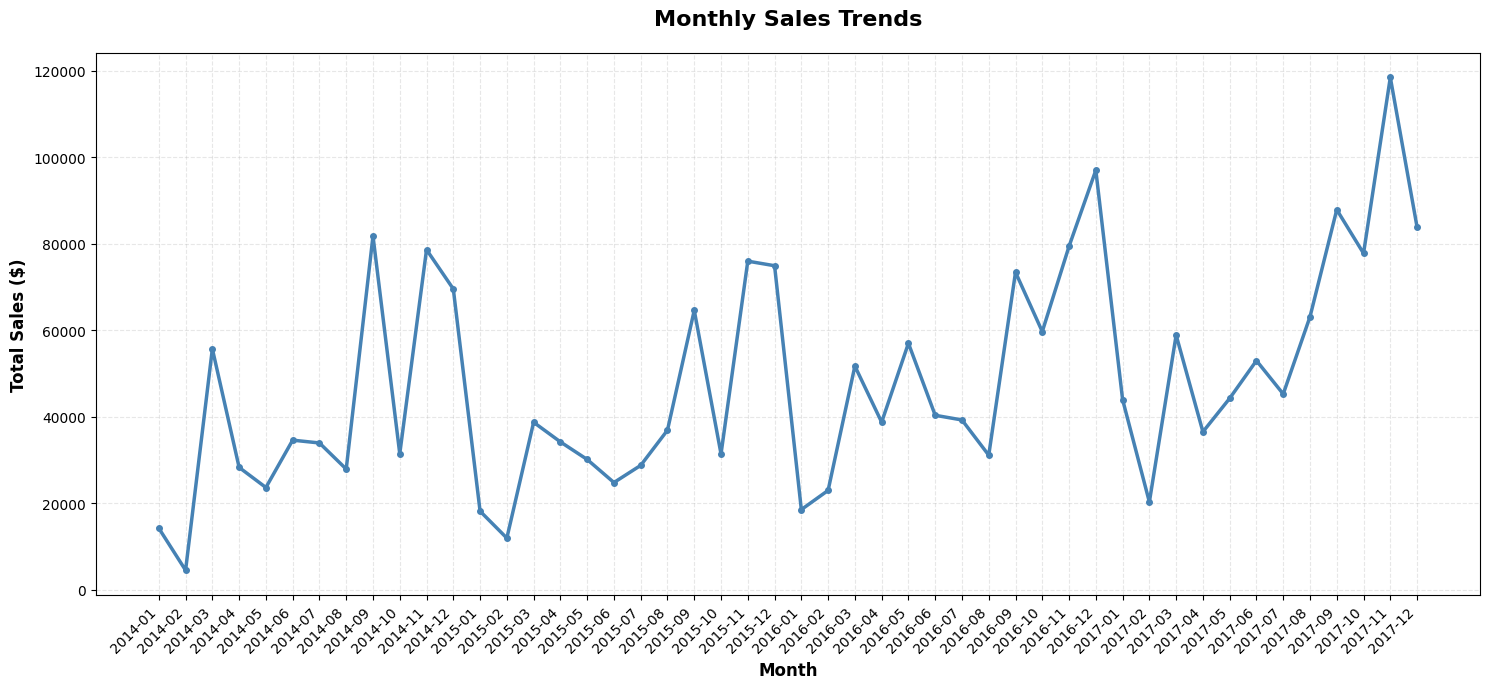

In [97]:
import matplotlib.pyplot as plt

# Convert to datetime and group by month
df['Order Date'] = pd.to_datetime(df['Order Date'], dayfirst=True)
monthly_sales = df.groupby(df['Order Date'].dt.to_period('M'))['Sales'].sum().reset_index()
monthly_sales.columns = ['Month', 'Total Sales']

# Convert Period to string for plotting
monthly_sales['Month_Str'] = monthly_sales['Month'].astype(str)

# Create the line graph
plt.figure(figsize=(15, 7))
plt.plot(monthly_sales['Month_Str'], monthly_sales['Total Sales'],
         marker='o',
         linewidth=2.5,
         markersize=4,
         color='steelblue')

plt.xlabel('Month', fontsize=12, fontweight='bold')
plt.ylabel('Total Sales ($)', fontsize=12, fontweight='bold')
plt.title('Monthly Sales Trends', fontsize=16, fontweight='bold', pad=20)
plt.grid(True, alpha=0.3, linestyle='--')
plt.xticks(rotation=45, ha='right')  # Rotate x-axis labels for readability
plt.tight_layout()
plt.show()